In [59]:
import pandas as pd
from pandas import DataFrame
from scipy.stats import ttest_ind


train_data_path = "训练集.xlsx"
train_label_path = "训练集类别.csv"

test_data_path = "验证集.xlsx"
test_label_path = "验证结果.csv"

In [81]:
def loadData(path):
    df = pd.read_excel(path, header=None, index_col=None)
    df = pd.DataFrame(df.values[:, 1:].T, columns=df[0])
    return df

def loadTrainData():
    df = loadData(train_data_path)
    df = df.drop("Gene_ID", axis=1)
    labels = pd.read_csv(train_label_path)
    labels = labels.drop('Sample', axis=1)
    return df.join(labels)



def tTestSelection(df: DataFrame):
    g = df.groupby("Class")
    columns = list(df.columns)
    columns.remove("Class")
    t_values = []
    for name in columns:
        l = g[name].apply(lambda x: list(x))
        (t, p) = ttest_ind(*l)
        t_values.append((name, t))
    t_values.sort(key=lambda x: x[1], reverse=True)
    return t_values

In [3]:
data = loadTrainData()

In [16]:
data.shape

(164, 10708)

In [25]:
t_values = tTestSelection(data)

In [34]:
N = 10

selected_column_names = [name for (name,t) in t_values[:N]]
selected_column_names

['A_24_P500584_SpotID_3653799',
 'Hs456200.1_SpotID_3659465',
 'A_23_P125519_SpotID_3658212',
 'A_23_P315345_SpotID_3653219',
 'A_24_P237389_SpotID_3662821',
 'A_23_P217409_SpotID_3656884',
 'A_24_P134653_SpotID_3660765',
 'A_23_P148255_SpotID_3653391',
 'Hs290759.1_SpotID_3660024',
 'A_24_P79529_SpotID_3661402']

In [35]:
df = data[selected_column_names]
labels = data['Class']

In [36]:
df

,A_24_P500584_SpotID_3653799,Hs456200.1_SpotID_3659465,A_23_P125519_SpotID_3658212,A_23_P315345_SpotID_3653219,A_24_P237389_SpotID_3662821,A_23_P217409_SpotID_3656884,A_24_P134653_SpotID_3660765,A_23_P148255_SpotID_3653391,Hs290759.1_SpotID_3660024,A_24_P79529_SpotID_3661402
0,0.705,-0.117,-0.429,-0.141,-0.0801,-0.114,-0.141,-1.11,0.214,-0.711
1,1.66,0.536,1.14,0.176,0.595,0.189,0.227,-2.47,0.322,-0.927
2,-5.47,-0.1,-0.573,0.0704,-0.199,-0.255,-0.655,-1.91,0.0566,-1.24
3,1.4,0.163,0.614,0.163,0.0144,0.151,0.757,-2.14,-0.0544,-0.986
4,-6.05,-0.318,-0.186,0.0286,-0.186,-0.0365,0.176,0.651,-0.47,0.872
...,...,...,...,...,...,...,...,...,...,...
159,2.05,0.888,0.39,0.189,0.202,0.275,0.263,-1.4,0.275,-0.552
160,-5.19,0.0976,-0.0277,-0.786,0.0841,-0.276,-0.523,-3.63,0.251,-1.62
161,-4.83,-0.0189,-0.353,-0.157,0.0426,-0.496,-0.527,-2.37,0.124,-1.25
162,-5.85,-0.238,0.0566,-0.902,-0.139,0.0704,0.189,-2.83,-0.0893,-1.6


In [37]:
labels

0      NEPSneg
1      NEPSneg
2      NEPSpos
3      NEPSneg
4      NEPSpos
        ...   
159    NEPSneg
160    NEPSpos
161    NEPSpos
162    NEPSpos
163    NEPSpos
Name: Class, Length: 164, dtype: object

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embedded = pca.fit_transform(df.values)
embedded[:5]

array([[ 2.77613152, -0.53774401],
       [ 3.64619589, -2.11262968],
       [-3.42472393, -0.12628388],
       [ 3.38142715, -1.75656403],
       [-3.17926898,  3.19817283]])

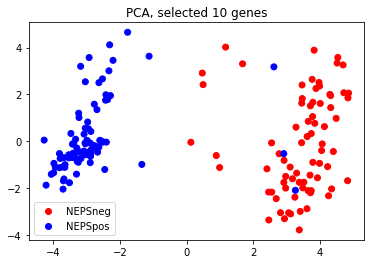

In [39]:
import matplotlib.pyplot as plt
colormap = {"NEPSneg": "r","NEPSpos" : "b"}
colors = [colormap[c] for c in labels.values]

plt.scatter(embedded[:,0],embedded[:,1],c=colors)
plt.title(f"PCA, selected {N} genes")

types = [plt.scatter([], [], color=c) for c in colormap.values()]
names = [n for n in colormap.keys()]
plt.legend(types, names, loc='best')

plt.show()

In [62]:
from sklearn import preprocessing
X = df.values
labelEncoder = preprocessing.LabelEncoder()
y = labelEncoder.fit_transform(labels.values)
y


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [63]:
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
import numpy as np
model = svm.SVC(C=1)
scorer = make_scorer(matthews_corrcoef)
results = cross_validate(model,X,y,scoring=scorer,cv=5)
scores = results['test_score']
score = np.average(scores)
print("Score = ",score)

0.9646637514125643

In [65]:
model.fit(X,y)

SVC(C=1)

In [82]:
data_test = loadData(test_data_path)
data_test.shape

(82, 10708)

In [83]:
df = data_test[selected_column_names]

In [88]:
prediction = model.predict(df.values)
prediction = labelEncoder.inverse_transform(prediction)

array(['NEPSneg', 'NEPSneg', 'NEPSneg', 'NEPSneg', 'NEPSneg', 'NEPSpos',
       'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSneg', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSneg',
       'NEPSneg', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSneg',
       'NEPSneg', 'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSneg',
       'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos',
       'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSneg',
       'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSpos', 'NEPSneg', 'NEPSpos',
       'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos', 'NEPSneg', 'NEPSpos',
       'NEPSpos', 'NEPSneg', 'NEPSpos', 'NEPSpos'],

In [89]:
df_result = data_test[['Gene_ID']].copy()
df_result['pred'] = prediction
df_result

,Gene_ID,pred
0,A251271410507,NEPSneg
1,A251271410521,NEPSneg
2,A251271410522,NEPSneg
3,A251271410523,NEPSneg
4,A251271410524,NEPSneg
...,...,...
77,A251271410649,NEPSpos
78,A251271410650,NEPSpos
79,A251271410651,NEPSneg
80,A251271410652,NEPSpos


In [90]:
df_result.to_csv(test_label_path,index=None)